In [53]:
pip install pandas matplotlib seaborn scikit-learn


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


Importing SDOH DF

In [54]:
import pandas as pd
import os

file_path = "/Users/madisonmariani/Desktop/DS 325/SDOH_2020_COUNTY_1_0.xlsx"

df = pd.read_excel(file_path, sheet_name='Data')
print(df.head())

   YEAR  COUNTYFIPS  STATEFIPS    STATE          COUNTY REGION  TERRITORY  \
0  2020        1001          1  Alabama  Autauga County  South          0   
1  2020        1003          1  Alabama  Baldwin County  South          0   
2  2020        1005          1  Alabama  Barbour County  South          0   
3  2020        1007          1  Alabama     Bibb County  South          0   
4  2020        1009          1  Alabama   Blount County  South          0   

   ACS_TOT_POP_WT  ACS_TOT_POP_US_ABOVE1  ACS_TOT_POP_ABOVE5  ...  \
0         55639.0                54929.0             52404.0  ...   
1        218289.0               216518.0            206329.0  ...   
2         25026.0                24792.0             23694.0  ...   
3         22374.0                22073.0             21121.0  ...   
4         57755.0                57164.0             54250.0  ...   

   POS_TOT_HOSP_AMBULANCE  POS_HOSP_AMBULANCE_RATE  POS_TOT_HOSP_CHEMO  \
0                     0.0                     0.

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print(df.columns)

Index(['YEAR', 'COUNTYFIPS', 'STATEFIPS', 'STATE', 'COUNTY', 'REGION',
       'TERRITORY', 'ACS_TOT_POP_WT', 'ACS_TOT_POP_US_ABOVE1',
       'ACS_TOT_POP_ABOVE5',
       ...
       'POS_TOT_HOSP_AMBULANCE', 'POS_HOSP_AMBULANCE_RATE',
       'POS_TOT_HOSP_CHEMO', 'POS_HOSP_CHEMO_RATE', 'POS_TOT_HOSP_ED',
       'POS_HOSP_ED_RATE', 'POS_PCT_HOSP_FOR_PROFIT',
       'POS_PCT_HOSP_NON_PROFIT', 'POS_PCT_HOSP_GOV', 'CEN_AIAN_NH_IND'],
      dtype='object', length=682)


PRELIM EXPLORATION

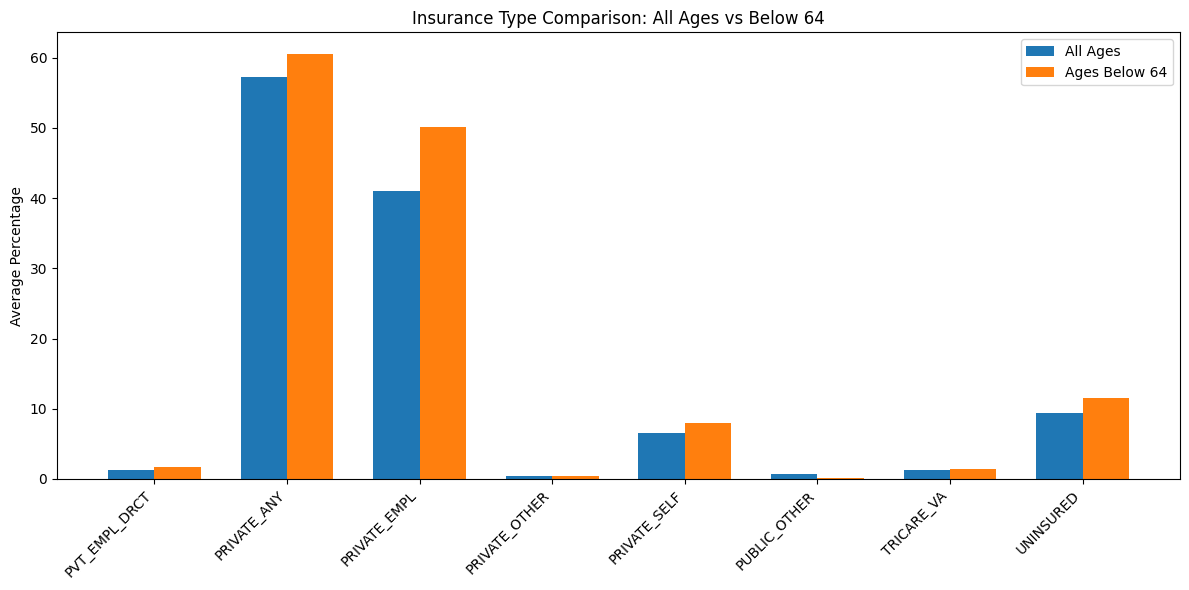

In [56]:
group_cols = [
    ('ACS_PCT_PVT_EMPL_DRCT', 'ACS_PCT_PVT_EMPL_DRCT_BELOW64'),
    ('ACS_PCT_PRIVATE_ANY', 'ACS_PCT_PRIVATE_ANY_BELOW64'),
    ('ACS_PCT_PRIVATE_EMPL', 'ACS_PCT_PRIVATE_EMPL_BELOW64'),
    ('ACS_PCT_PRIVATE_OTHER', 'ACS_PCT_PRIVATE_OTHER_BELOW64'),
    ('ACS_PCT_PRIVATE_SELF', 'ACS_PCT_PRIVATE_SELF_BELOW64'),
    ('ACS_PCT_PUBLIC_OTHER', 'ACS_PCT_PUBLIC_OTHER_BELOW64'),
    ('ACS_PCT_TRICARE_VA', 'ACS_PCT_TRICARE_VA_BELOW64'),
    ('ACS_PCT_UNINSURED', 'ACS_PCT_UNINSURED_BELOW64')
]

labels = [col[0].replace("ACS_PCT_", "").replace("_BELOW64", "") for col in group_cols]
general = [df[col[0]].mean() for col in group_cols]
below64 = [df[col[1]].mean() for col in group_cols]

x = range(len(group_cols))
width = 0.35

plt.figure(figsize=(12, 6))
plt.bar(x, general, width=width, label='All Ages')
plt.bar([p + width for p in x], below64, width=width, label='Ages Below 64')
plt.xticks([p + width / 2 for p in x], labels, rotation=45, ha='right')
plt.title('Insurance Type Comparison: All Ages vs Below 64')
plt.ylabel('Average Percentage')
plt.legend()
plt.tight_layout()
plt.show()


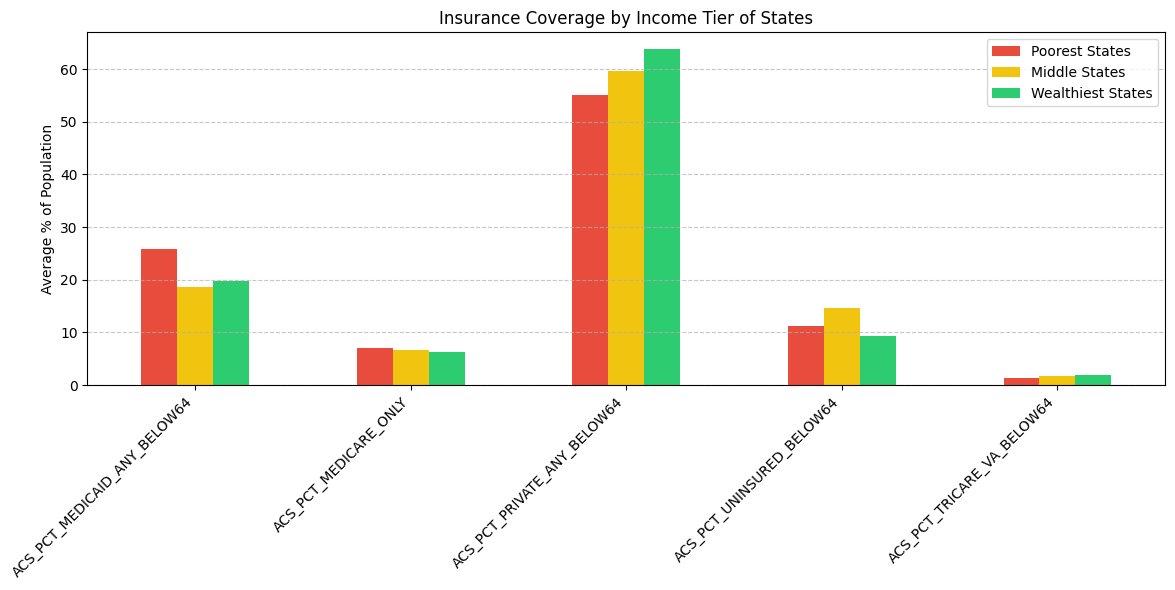

In [57]:
wealthiest_states = [
    "Maryland", "New Jersey", "Massachusetts", "Hawaii", "California",
    "Connecticut", "Washington", "New Hampshire", "Colorado", "Virginia"
]

middle_states = [
    "Missouri", "Montana", "Georgia", "North Carolina", "Florida",
    "Texas", "Wisconsin", "Michigan", "Nevada", "Iowa"
]
poorest_states = [
    "Mississippi", "West Virginia", "Arkansas", "Louisiana", "New Mexico",
    "Alabama", "Kentucky", "Oklahoma", "South Carolina", "Indiana"
]

insurance_cols = [
    'ACS_PCT_MEDICAID_ANY_BELOW64', 'ACS_PCT_MEDICARE_ONLY',
    'ACS_PCT_PRIVATE_ANY_BELOW64', 'ACS_PCT_UNINSURED_BELOW64',
    'ACS_PCT_TRICARE_VA_BELOW64'
]

df_poorest = df[df['STATE'].isin(poorest_states)]
df_middle = df[df['STATE'].isin(middle_states)]
df_wealthiest = df[df['STATE'].isin(wealthiest_states)]

poorest_avg = df_poorest[insurance_cols].mean()
middle_avg = df_middle[insurance_cols].mean()
wealthiest_avg = df_wealthiest[insurance_cols].mean()

compare_df = pd.DataFrame({
    'Poorest States': poorest_avg,
    'Middle States': middle_avg,
    'Wealthiest States': wealthiest_avg
})

compare_df.plot(kind='bar', figsize=(12, 6), color=['#e74c3c', '#f1c40f', '#2ecc71'])
plt.title('Insurance Coverage by Income Tier of States')
plt.ylabel('Average % of Population')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<Figure size 5000x1000 with 0 Axes>

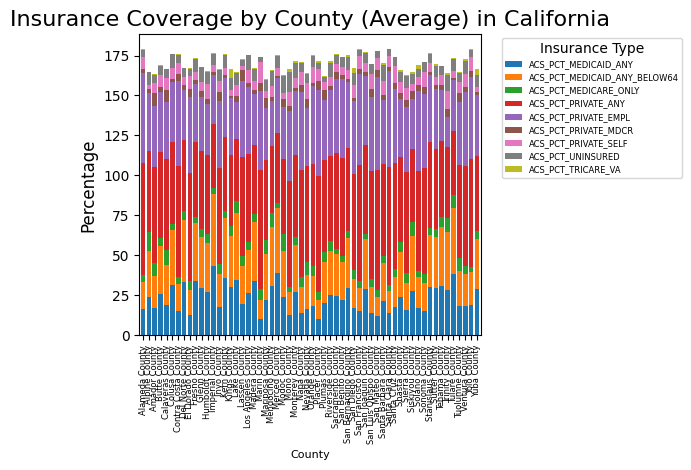

In [58]:
df_california = df[df['STATE'] == "California"]

insurance_columns = [
    'ACS_PCT_MEDICAID_ANY', 'ACS_PCT_MEDICAID_ANY_BELOW64', 'ACS_PCT_MEDICARE_ONLY', 
    'ACS_PCT_PRIVATE_ANY', 'ACS_PCT_PRIVATE_EMPL', 'ACS_PCT_PRIVATE_MDCR', 
    'ACS_PCT_PRIVATE_SELF', 'ACS_PCT_UNINSURED', 'ACS_PCT_TRICARE_VA'
]

df_california_insurance = df_california[['COUNTY'] + insurance_columns]

df_county_averages = df_california_insurance.groupby('COUNTY').mean()

plt.figure(figsize=(50, 10))  
ax = df_county_averages[insurance_columns].plot(kind='bar', stacked=True, width=0.8)

plt.title('Insurance Coverage by County (Average) in California', fontsize=16)
plt.xlabel('County', fontsize=8)
plt.ylabel('Percentage', fontsize=12)

ax.set_xticklabels(ax.get_xticklabels(), fontsize=6)

plt.legend(title='Insurance Type', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=6)

plt.tight_layout()
plt.show()

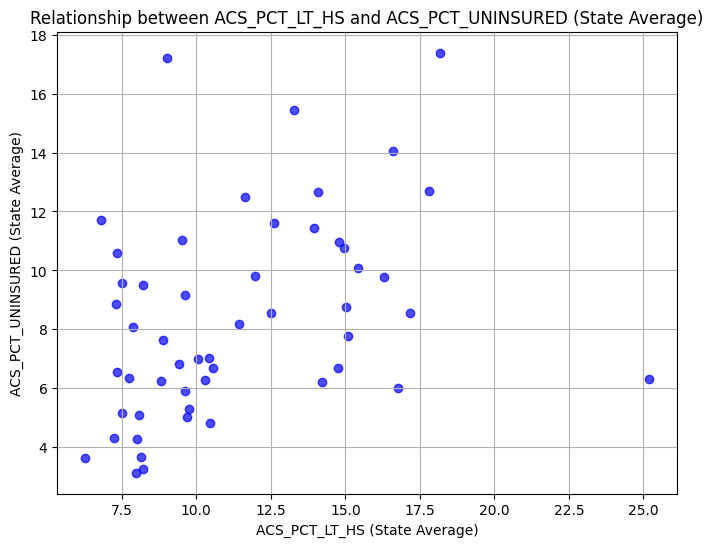

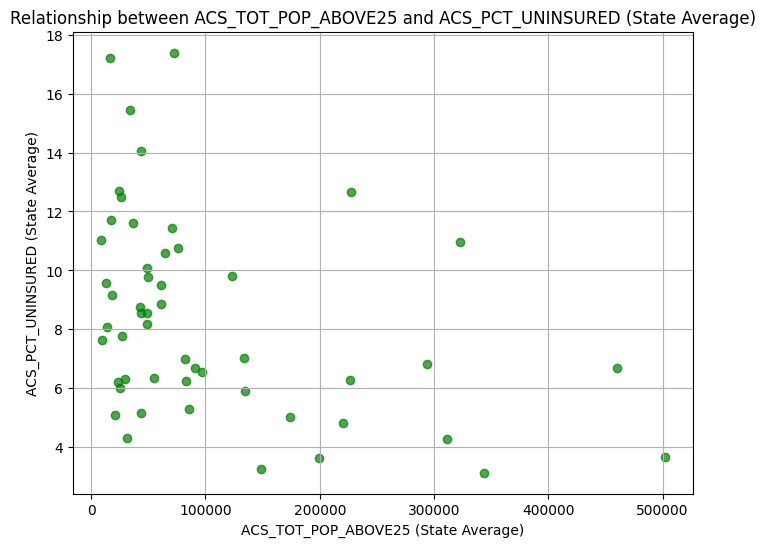

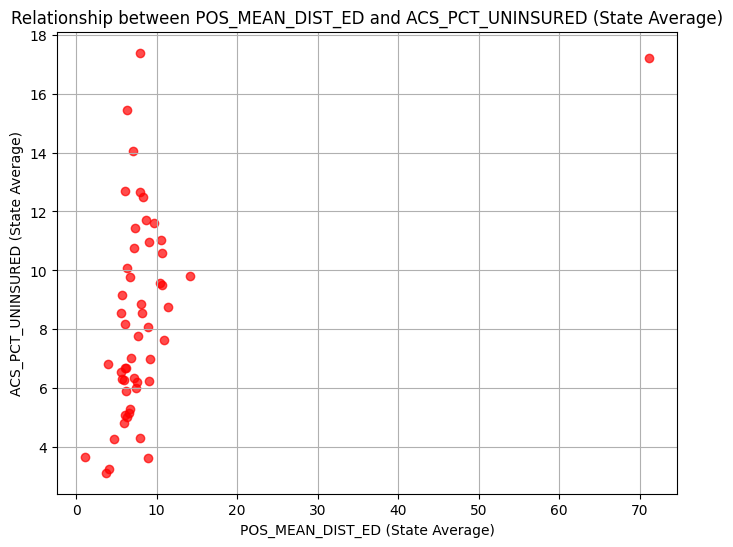

Correlation Matrix (State-Level):
                     ACS_PCT_LT_HS  ACS_TOT_POP_ABOVE25  POS_MEAN_DIST_ED  \
ACS_PCT_LT_HS             1.000000            -0.130967         -0.092256   
ACS_TOT_POP_ABOVE25      -0.130967             1.000000         -0.219543   
POS_MEAN_DIST_ED         -0.092256            -0.219543          1.000000   
ACS_PCT_UNINSURED         0.371353            -0.385407          0.441891   

                     ACS_PCT_UNINSURED  
ACS_PCT_LT_HS                 0.371353  
ACS_TOT_POP_ABOVE25          -0.385407  
POS_MEAN_DIST_ED              0.441891  
ACS_PCT_UNINSURED             1.000000  


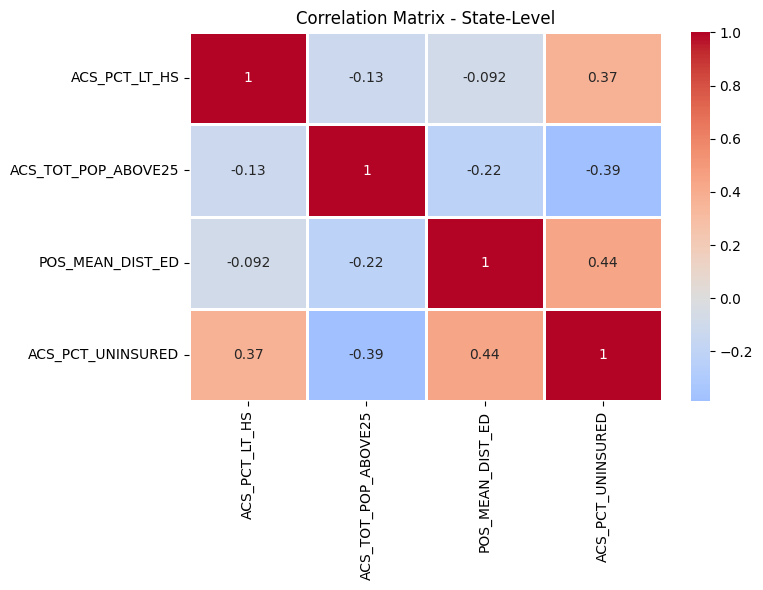

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_state = df.groupby('STATE')[['ACS_PCT_LT_HS', 'ACS_TOT_POP_ABOVE25', 'POS_MEAN_DIST_ED', 'ACS_PCT_UNINSURED']].mean()

# Plot ACS_PCT_LT_HS vs ACS_PCT_UNINSURED
plt.figure(figsize=(8, 6))
plt.scatter(df_state['ACS_PCT_LT_HS'], df_state['ACS_PCT_UNINSURED'], c='blue', alpha=0.7)
plt.title('Relationship between ACS_PCT_LT_HS and ACS_PCT_UNINSURED (State Average)')
plt.xlabel('ACS_PCT_LT_HS (State Average)')
plt.ylabel('ACS_PCT_UNINSURED (State Average)')
plt.grid(True)
plt.show()

# Plot ACS_TOT_POP_ABOVE25 vs ACS_PCT_UNINSURED
plt.figure(figsize=(8, 6))
plt.scatter(df_state['ACS_TOT_POP_ABOVE25'], df_state['ACS_PCT_UNINSURED'], c='green', alpha=0.7)
plt.title('Relationship between ACS_TOT_POP_ABOVE25 and ACS_PCT_UNINSURED (State Average)')
plt.xlabel('ACS_TOT_POP_ABOVE25 (State Average)')
plt.ylabel('ACS_PCT_UNINSURED (State Average)')
plt.grid(True)
plt.show()

# Plot POS_MEAN_DIST_ED vs ACS_PCT_UNINSURED
plt.figure(figsize=(8, 6))
plt.scatter(df_state['POS_MEAN_DIST_ED'], df_state['ACS_PCT_UNINSURED'], c='red', alpha=0.7)
plt.title('Relationship between POS_MEAN_DIST_ED and ACS_PCT_UNINSURED (State Average)')
plt.xlabel('POS_MEAN_DIST_ED (State Average)')
plt.ylabel('ACS_PCT_UNINSURED (State Average)')
plt.grid(True)
plt.show()

correlation_matrix = df_state.corr()
print("Correlation Matrix (State-Level):")
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=1)
plt.title("Correlation Matrix - State-Level")
plt.tight_layout()
plt.show()

PCA Plot to explain variance

Explained variance ratio for the 2 components: [0.39501785 0.19739933]
Total explained variance by 2 components: 0.5924


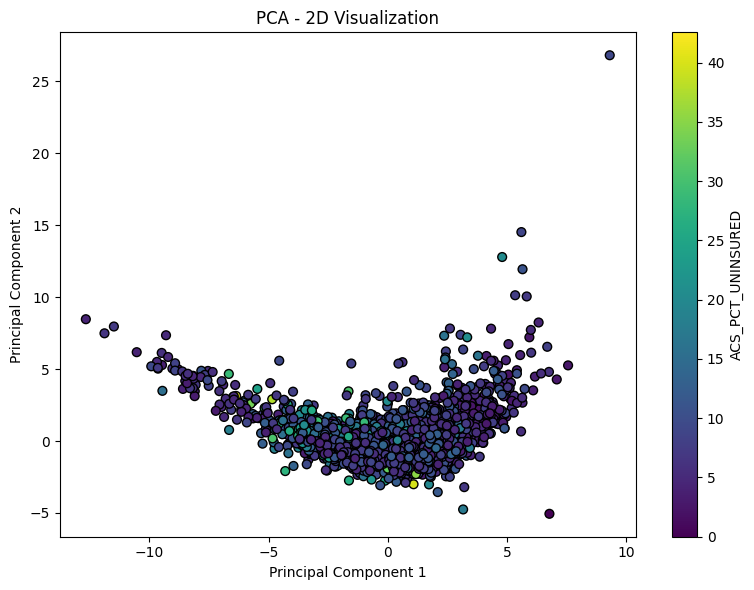

                            PC1       PC2
ACS_TOT_POP_16_19      0.132446  0.414020
ACS_TOT_POP_ABOVE25    0.132033  0.411038
ACS_PCT_EMPLOYED       0.286227 -0.304593
ACS_PCT_UNEMPLOY      -0.286228  0.304592
ACS_PCT_HH_INC_10000  -0.338252  0.218715
ACS_PCT_HH_INC_100000  0.364515  0.172552
ACS_PCT_HH_INC_14999  -0.343378  0.068554
ACS_PCT_HH_INC_24999  -0.352745  0.002499
ACS_PCT_HH_INC_49999  -0.227679 -0.252074
ACS_PCT_HH_INC_99999   0.254233 -0.315208
ACS_PCT_GRADUATE_DGR   0.252029  0.318528
ACS_PCT_HS_GRADUATE   -0.202420 -0.332963
ACS_PCT_LT_HS         -0.300680  0.084657
POS_MEAN_DIST_ED      -0.013282 -0.096833


In [60]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

features = [
    "ACS_TOT_POP_16_19",
    "ACS_TOT_POP_ABOVE25",
    "ACS_PCT_EMPLOYED",
    "ACS_PCT_UNEMPLOY",
    "ACS_PCT_HH_INC_10000",
    "ACS_PCT_HH_INC_100000",
    "ACS_PCT_HH_INC_14999",
    "ACS_PCT_HH_INC_24999",
    "ACS_PCT_HH_INC_49999",
    "ACS_PCT_HH_INC_99999",
    "ACS_PCT_GRADUATE_DGR",
    "ACS_PCT_HS_GRADUATE",
    "ACS_PCT_LT_HS",
    "POS_MEAN_DIST_ED"
]

target = "ACS_PCT_UNINSURED"


df_model = df[features + [target]].dropna()
X = df_model[features]
y = df_model[target]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


pca = PCA(n_components=2) 
X_pca = pca.fit_transform(X_scaled)


print(f"Explained variance ratio for the 2 components: {pca.explained_variance_ratio_}")
print(f"Total explained variance by 2 components: {np.sum(pca.explained_variance_ratio_):.4f}")


plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=40)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA - 2D Visualization")
plt.colorbar(label=target) 
plt.tight_layout()
plt.show()

loadings_df = pd.DataFrame(pca.components_.T, index=features, columns=['PC1', 'PC2'])
print(loadings_df)



In [61]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

features = [
    'ACS_TOT_POP_16_19', 'ACS_TOT_POP_ABOVE25',
    'ACS_PCT_EMPLOYED', 'ACS_PCT_UNEMPLOY',
    'ACS_PCT_HH_INC_10000', 'ACS_PCT_HH_INC_100000',
    'ACS_PCT_HH_INC_14999', 'ACS_PCT_HH_INC_24999',
    'ACS_PCT_HH_INC_49999', 'ACS_PCT_HH_INC_99999',
    'ACS_PCT_GRADUATE_DGR', 'ACS_PCT_HS_GRADUATE',
    'ACS_PCT_LT_HS', 'POS_MEAN_DIST_ED',
    'STATE', 'REGION'  
]
target = 'ACS_PCT_UNINSURED'

model_data = df[features + [target]].dropna()
X = model_data[features]
y = model_data[target]

categorical_features = ['STATE', 'REGION']
numeric_features = [f for f in features if f not in categorical_features]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error: 1.91
R² Score: 0.63


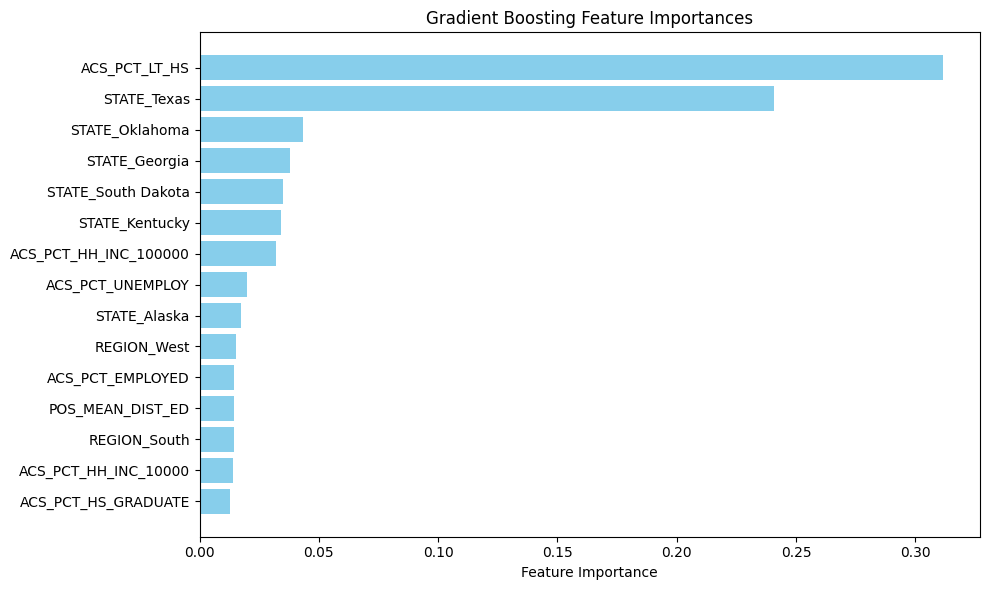

In [62]:
categorical_features = ['STATE', 'REGION']  
numeric_features = [col for col in X.columns if col not in categorical_features]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

gb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gb_pipeline.fit(X_train, y_train)

gb_model = gb_pipeline.named_steps['model']

feature_names = (
    preprocessor.named_transformers_['num'].get_feature_names_out(numeric_features).tolist() +
    preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features).tolist()
)

importances = gb_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.barh(np.array(feature_names)[indices[:15]], importances[indices[:15]], color='skyblue')
plt.xlabel("Feature Importance")
plt.title("Gradient Boosting Feature Importances")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [63]:
features = [
    'ACS_TOT_POP_16_19', 'ACS_TOT_POP_ABOVE25',
    'ACS_PCT_EMPLOYED', 'ACS_PCT_UNEMPLOY',
    'ACS_PCT_HH_INC_10000', 'ACS_PCT_HH_INC_100000',
    'ACS_PCT_HH_INC_14999', 'ACS_PCT_HH_INC_24999',
    'ACS_PCT_HH_INC_49999', 'ACS_PCT_HH_INC_99999',
    'ACS_PCT_GRADUATE_DGR', 'ACS_PCT_HS_GRADUATE',
    'ACS_PCT_LT_HS', 'POS_MEAN_DIST_ED',
    'STATE', 'REGION'
]
target = 'ACS_PCT_UNINSURED'

df_model = df[features + [target]].dropna()
X = df_model[features]
y = df_model[target]

categorical_features = ['STATE', 'REGION']
numeric_features = [f for f in features if f not in categorical_features]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42))
])

mae_scores = cross_val_score(pipeline, X, y, cv=3, scoring='neg_mean_absolute_error')
r2_scores = cross_val_score(pipeline, X, y, cv=3, scoring='r2')

mean_mae = -np.mean(mae_scores)
mean_r2 = np.mean(r2_scores)

print(f"Mean CV MAE: {mean_mae:.2f}")
print(f"Mean CV R²: {mean_r2:.2f}")


Mean CV MAE: 3.04
Mean CV R²: 0.25
